# **Amazon Delivery Time Prediction - EDA**



**Write Problem Statement Here.**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## **1. Import Data**

### Import Libraries

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [6]:
# Load Dataset
# Amazon Delivery Time (ADT)
adt_temp = pd.read_csv("C:/Users/srush/Desktop/00_Labmentix/08_Amazon Delivery Time Prediction/Dataset/amazon_delivery_wrangled.csv")

### Dataset First View

In [7]:
# Dataset First Look
adt_temp.head(5)

,Unnamed: 0,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,sunny,high,motorcycle,urban,120,clothing
1,1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,stormy,jam,scooter,metropolitian,165,electronics
2,2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,sandstorms,low,motorcycle,urban,130,sports
3,3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,sunny,medium,motorcycle,metropolitian,105,cosmetics
4,4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,cloudy,high,scooter,metropolitian,150,toys


## **2. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1 : Distribution of Delivery Times

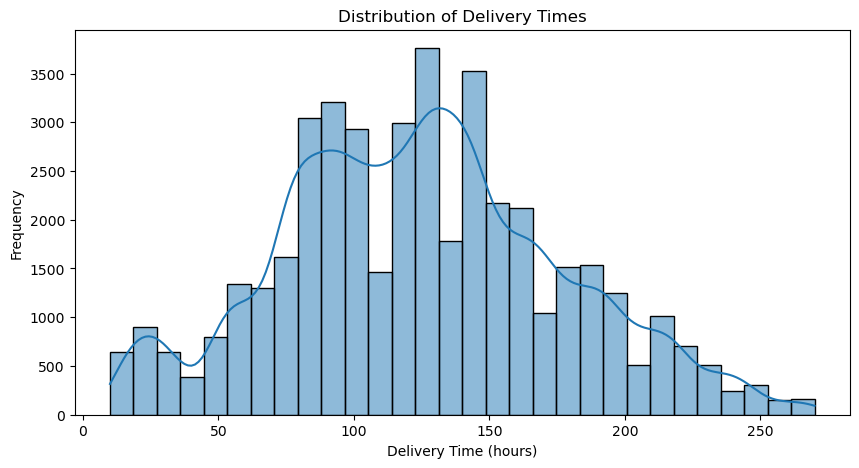

In [27]:
# Chart - 1: Distributuion of Delivery Times

plt.figure(figsize=(10,5))
sns.histplot(adt_temp['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (hours)")
plt.ylabel("Frequency")
plt.show()

#### Chart - 2 : Boxplot of Delivery Times

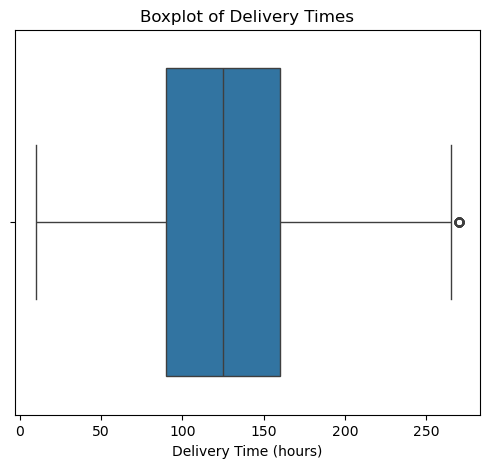

In [28]:
# Chart - 2: Boxplot of Delivery Times

plt.figure(figsize=(6,5))
sns.boxplot(x=adt_temp['Delivery_Time'])
plt.title("Boxplot of Delivery Times")
plt.xlabel("Delivery Time (hours)")
plt.show()

#### Chart - 3 : Impact of Weather on Delivery Times

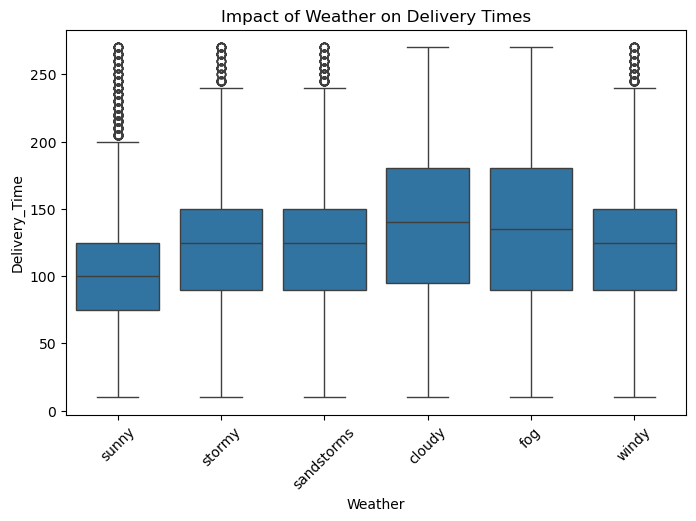

In [29]:
# Chart - 3: Impact of Weather on Delivery Times

plt.figure(figsize=(8,5))
sns.boxplot(x='Weather', y='Delivery_Time', data=adt_temp)
plt.title("Impact of Weather on Delivery Times")
plt.xticks(rotation=45)
plt.show()

#### Chart - 4 : Impact of Traffic on Delivery Times

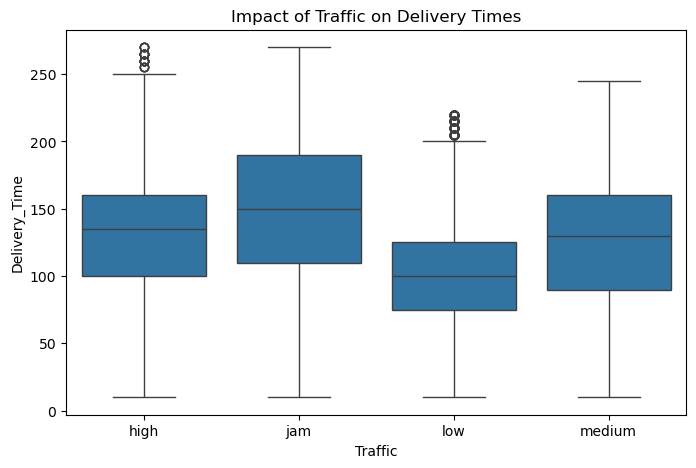

In [30]:
# Chart - 4: Impact of Traffic on Delivery Times

plt.figure(figsize=(8,5))
sns.boxplot(x='Traffic', y='Delivery_Time', data=adt_temp)
plt.title("Impact of Traffic on Delivery Times")
plt.show()

#### Chart - 5 : Agent Rating vs Delivery Time

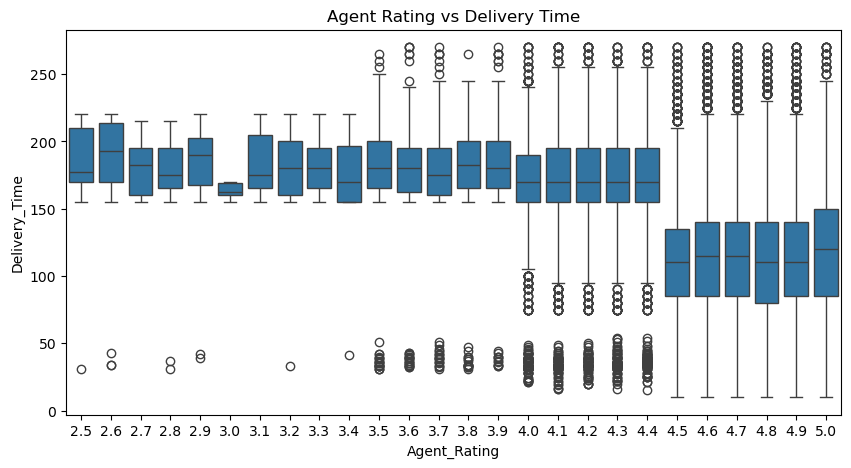

In [31]:
# Chart - 5: Agent Rating vs Delivery Time (Boxplot)

plt.figure(figsize=(10,5))
sns.boxplot(x='Agent_Rating', y='Delivery_Time', data=adt_temp)
plt.title("Agent Rating vs Delivery Time")
plt.show()

#### Chart - 6 : Agent Age vs  Average Delivery Time

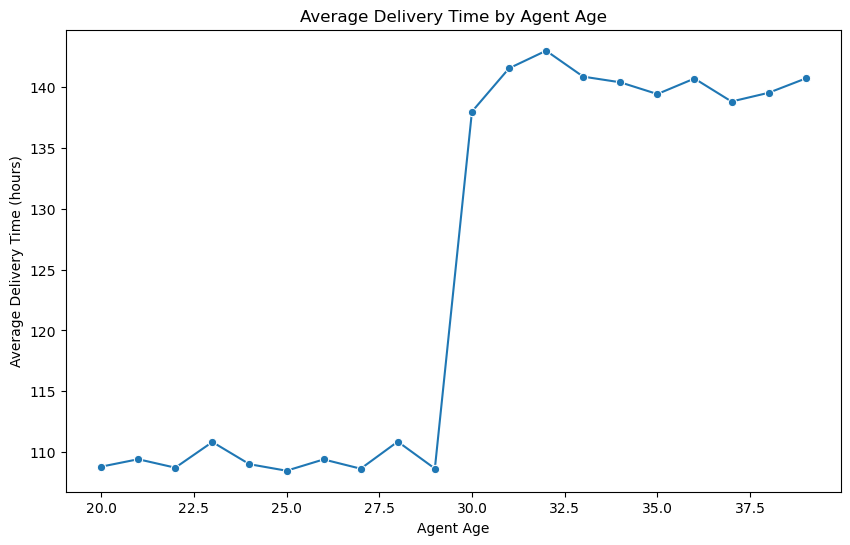

In [32]:
# Chart - 6: Agent Age vs  Average Delivery Time (Scatter)

plt.figure(figsize=(10,6))

# Group by Agent_Age and calculate mean delivery time
age_avg = adt_temp.groupby('Agent_Age')['Delivery_Time'].mean().reset_index()

sns.lineplot(x='Agent_Age', y='Delivery_Time', data=age_avg, marker='o')
plt.title("Average Delivery Time by Agent Age")
plt.xlabel("Agent Age")
plt.ylabel("Average Delivery Time (hours)")
plt.show()

#### Chart - 7 : Delivery Time by Area Type

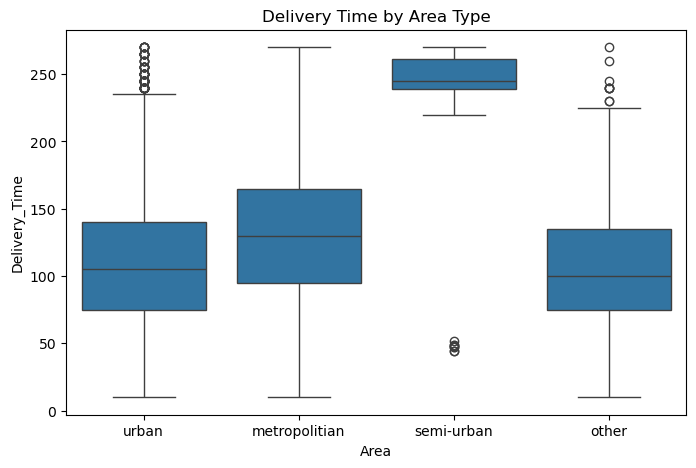

In [33]:
# Chart - 7: Delivery Time by Area Type

plt.figure(figsize=(8,5))
sns.boxplot(x='Area', y='Delivery_Time', data=adt_temp)
plt.title("Delivery Time by Area Type")
plt.show()

#### Chart - 8 : Average Delivery Time by Product Category

C:\Users\srush\AppData\Local\Temp\ipykernel_24092\3018080088.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Delivery_Time', data=adt_temp, estimator=np.mean, ci=None)


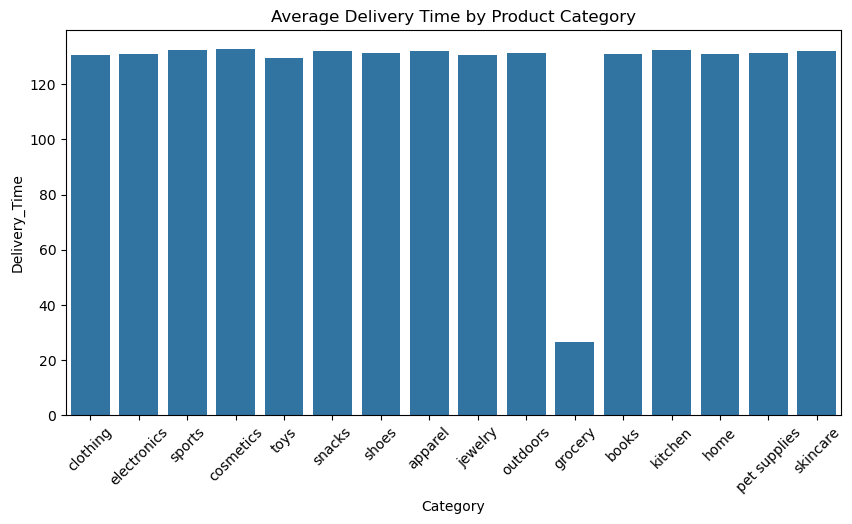

In [8]:
# Chart - 8: Average Delivery Time by Product Category

plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Delivery_Time', data=adt_temp, estimator=np.mean, ci=None)
plt.title("Average Delivery Time by Product Category")
plt.xticks(rotation=45)
plt.show()

#### Chart - 9 : Delivery Time by Vehicle Type

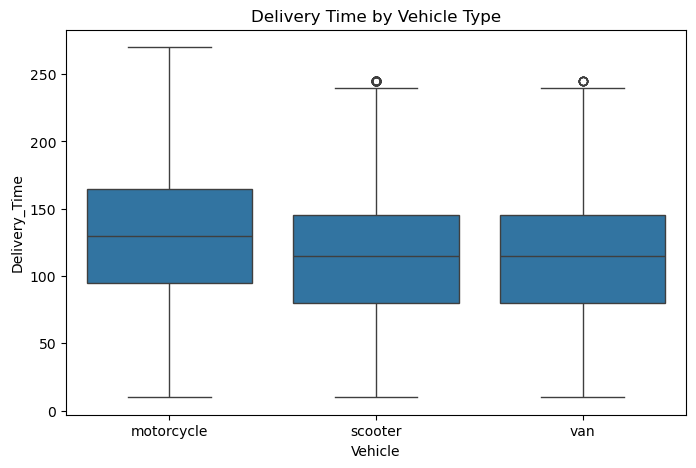

In [35]:
# Chart - 9: Delivery Time by Vehicle Type (Boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(x='Vehicle', y='Delivery_Time', data=adt_temp)
plt.title("Delivery Time by Vehicle Type")
plt.show()

#### Chart - 10 : Distribution of Agent Ages

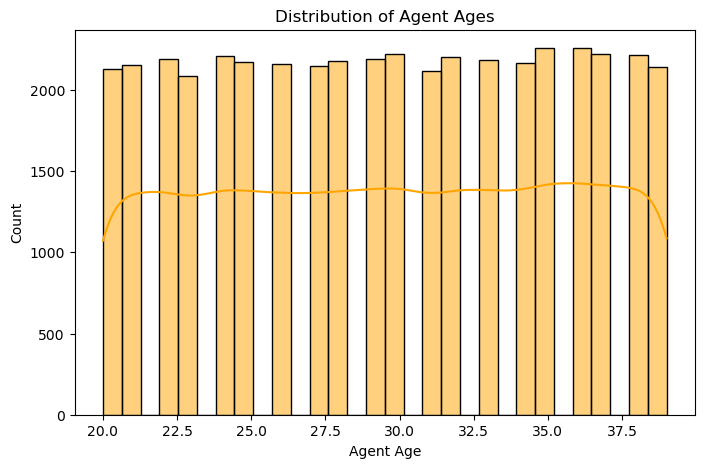

In [36]:
# Chart - 10: Distribution of Agent Ages

plt.figure(figsize=(8,5))
sns.histplot(adt_temp['Agent_Age'], bins=30, kde=True, color="orange")
plt.title("Distribution of Agent Ages")
plt.xlabel("Agent Age")
plt.show()

#### Chart - 11 : Average Delivery Time Over Time

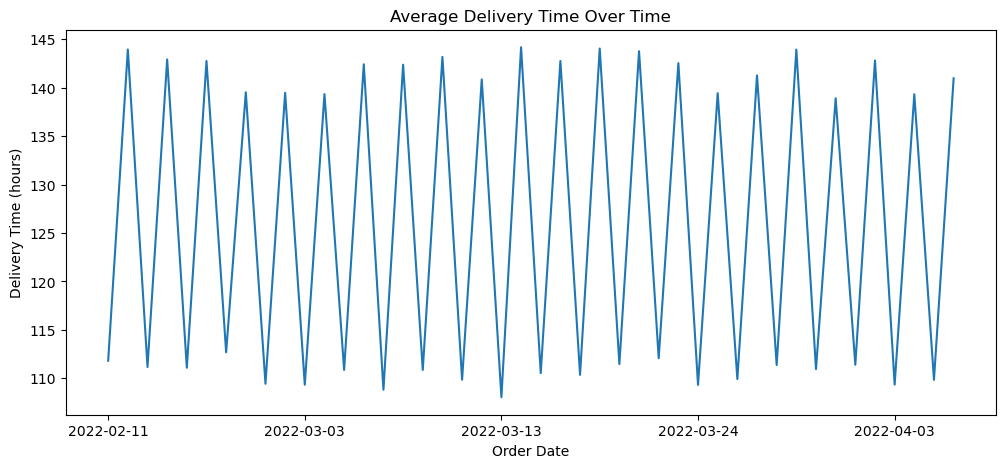

In [37]:
# Chart - 11: Average Delivery Time Over Time

adt_temp['Order_Date'] = pd.to_datetime(adt_temp['Order_Date'])

plt.figure(figsize=(12,5))
adt_data.groupby('Order_Date')['Delivery_Time'].mean().plot()
plt.title("Average Delivery Time Over Time")
plt.ylabel("Delivery Time (hours)")
plt.xlabel("Order Date")
plt.show()

#### Chart - 12 : Delivery Time by Agent Rating Quartiles

C:\Users\srush\AppData\Local\Temp\ipykernel_2972\1736060090.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pd.qcut(adt_temp['Agent_Rating'], 4), y='Delivery_Time', data=adt_temp, estimator=np.mean, ci=None)


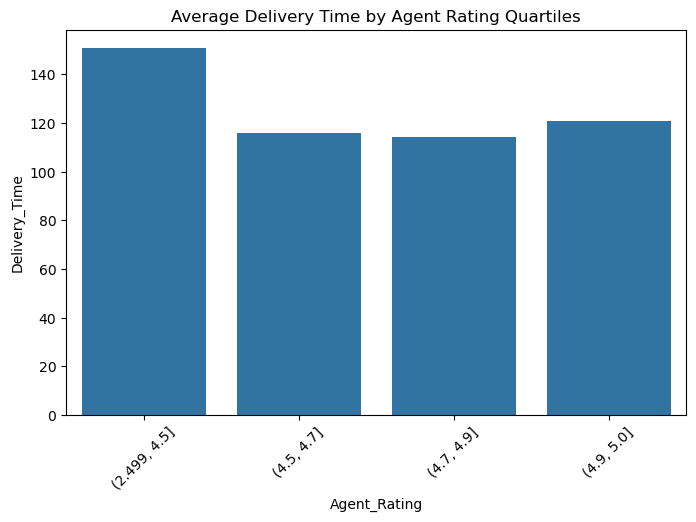

In [38]:
# Chart - 12: Delivery Time by Agent Rating Quartiles

plt.figure(figsize=(8,5))
sns.barplot(x=pd.qcut(adt_temp['Agent_Rating'], 4), y='Delivery_Time', data=adt_temp, estimator=np.mean, ci=None)
plt.title("Average Delivery Time by Agent Rating Quartiles")
plt.xticks(rotation=45)
plt.show()

#### Chart - 13 : Delivery Time Distribution by Traffic

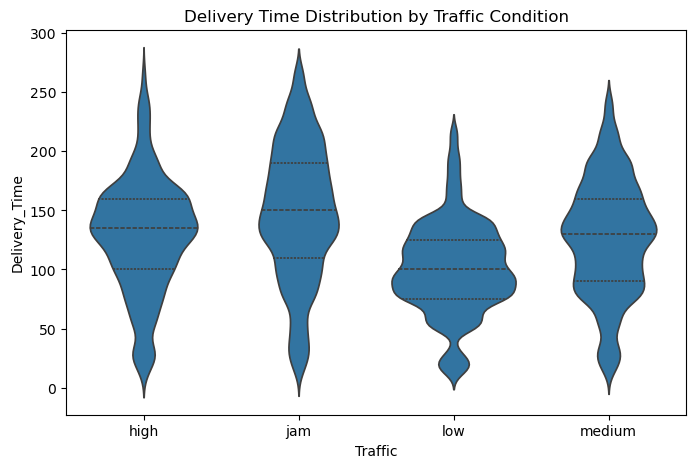

In [9]:
# Chart - 13 : Delivery Time Distribution by Traffic

plt.figure(figsize=(8,5))
sns.violinplot(x='Traffic', y='Delivery_Time', data=adt_temp, inner="quartile")
plt.title("Delivery Time Distribution by Traffic Condition")
plt.show()

#### Chart - 14 : Correlation Heatmap visualization code

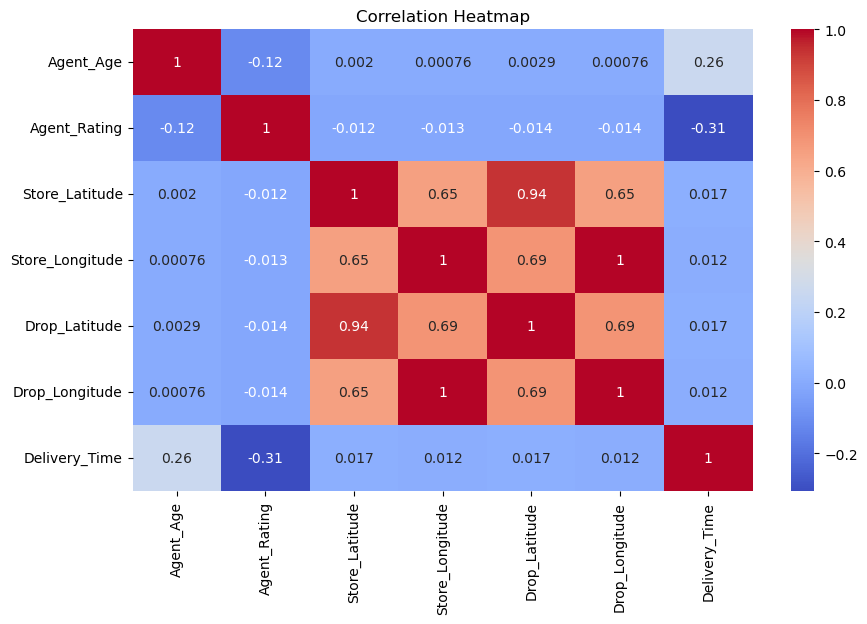

In [40]:
# Chart - 14: Correlation Heatmap visualization code

plt.figure(figsize=(10,6))
sns.heatmap(adt_temp.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Chart - 15 - Pair Plot

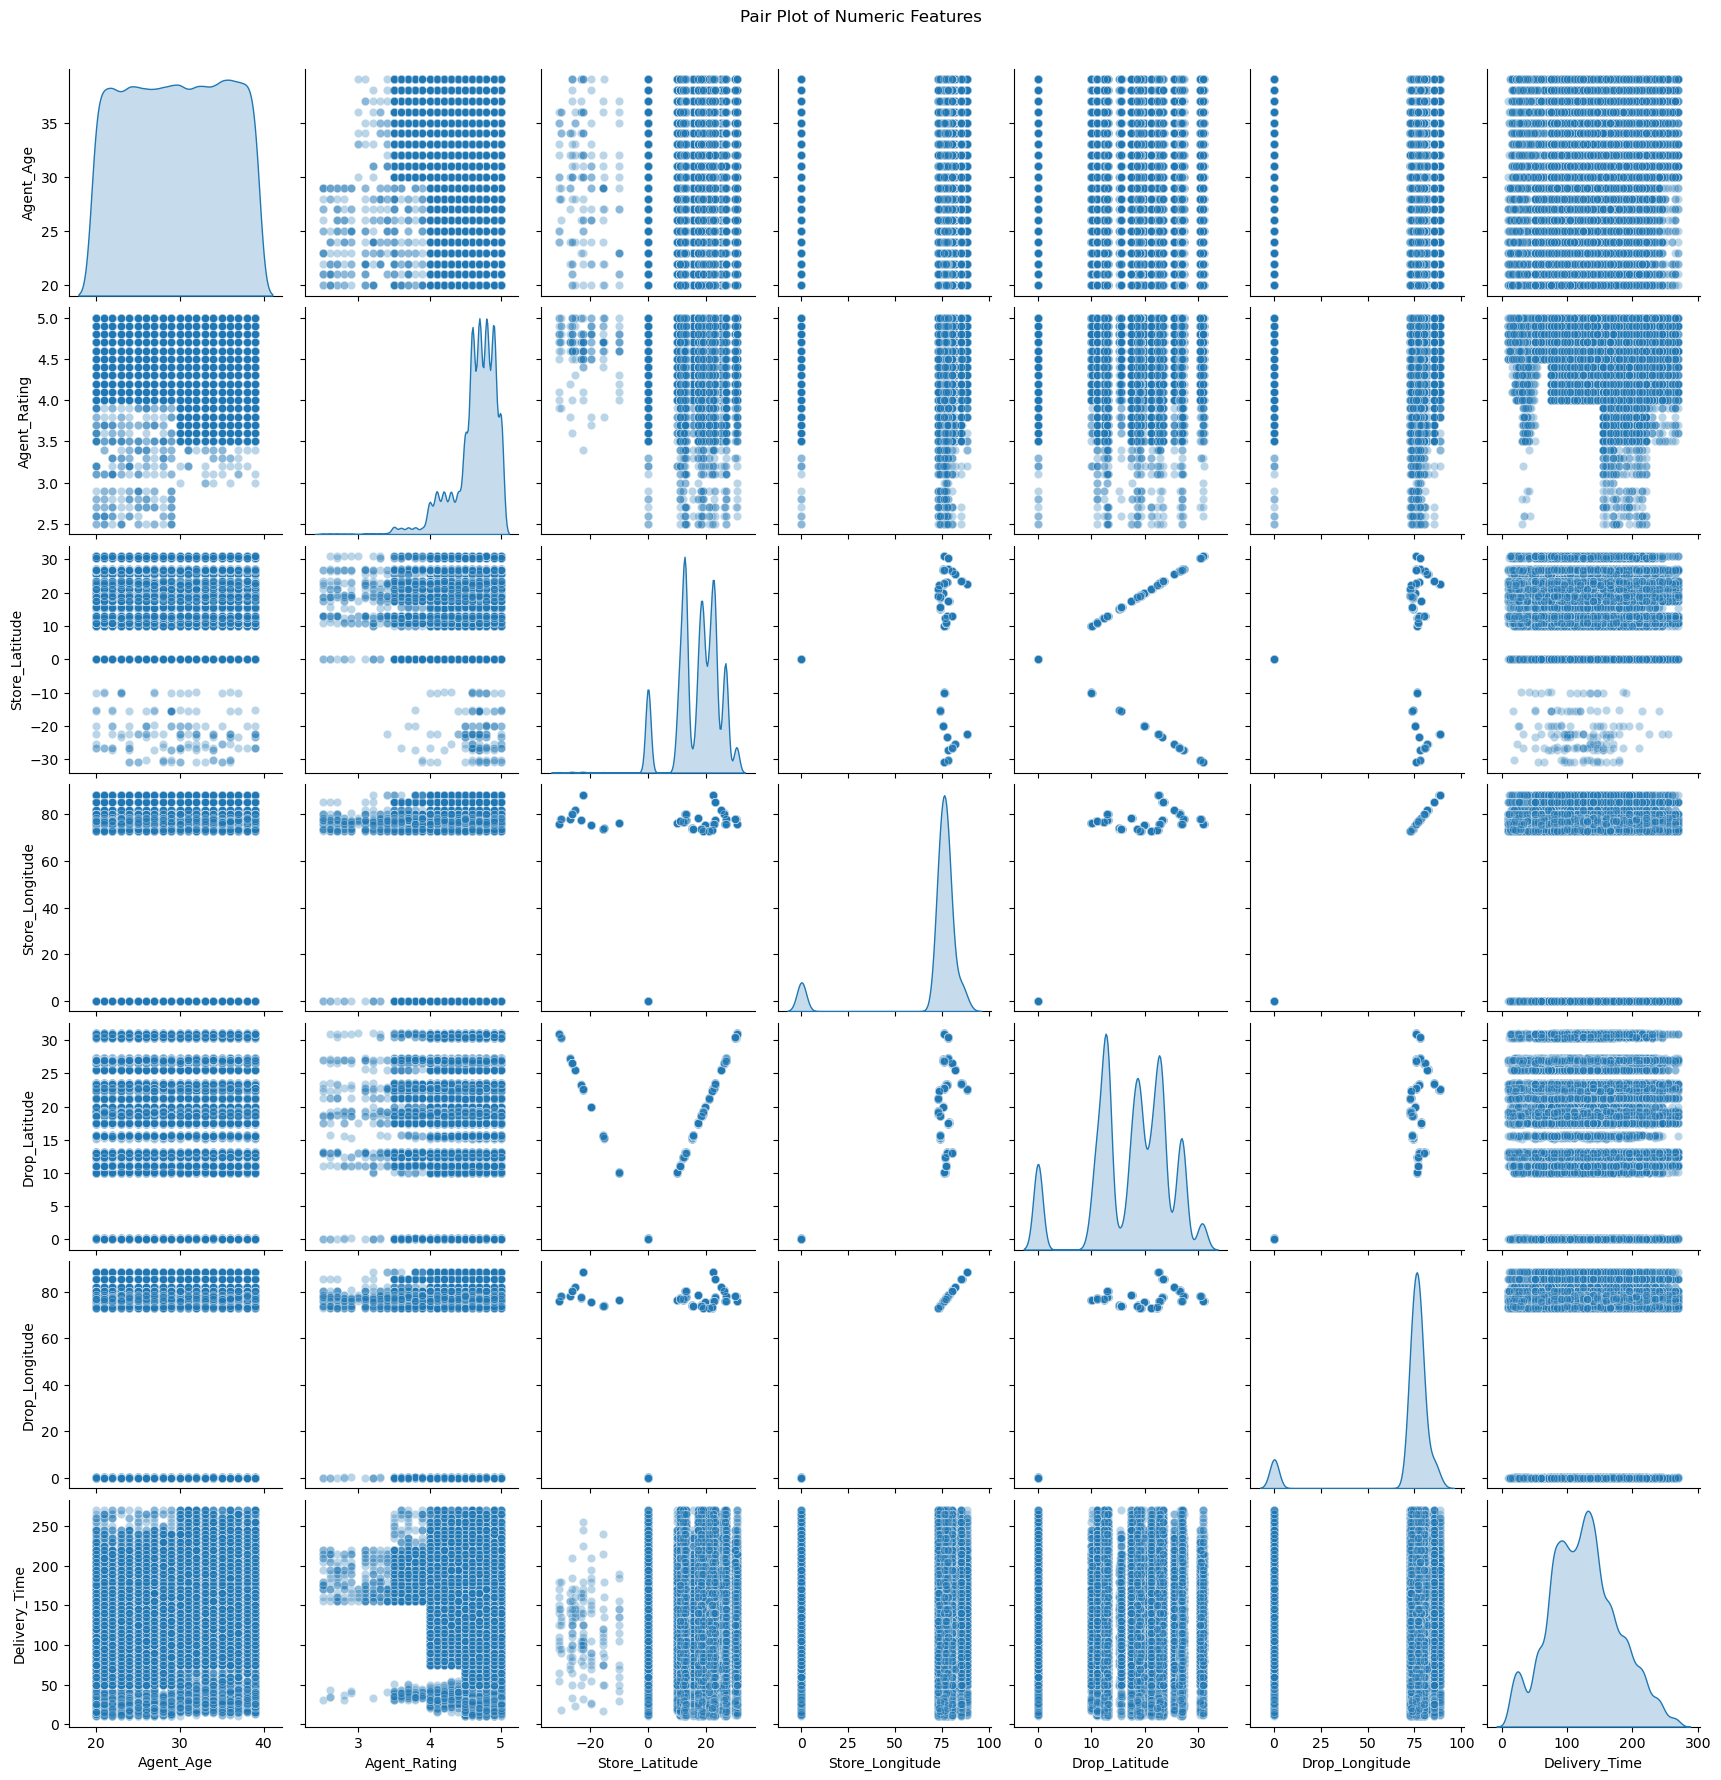

In [41]:
# Pair Plot visualization code

numeric_cols = ['Agent_Age', 'Agent_Rating',
                'Store_Latitude', 'Store_Longitude',
                'Drop_Latitude', 'Drop_Longitude',
                'Delivery_Time']
sns.pairplot(adt_temp[numeric_cols], diag_kind="kde", plot_kws={'alpha':0.3})
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null (H₀): Traffic condition has no effect on delivery time.
- Alternate (H₁): Traffic condition does affect delivery time.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import kruskal

# Group delivery times by traffic category
groups = [adt_temp[adt_temp['Traffic'] == t]['Delivery_Time'].dropna()
          for t in adt_temp['Traffic'].unique()]

# Kruskal-Wallis Test (non-parametric ANOVA)
h_stat, p_val = kruskal(*groups)
print("Kruskal-Wallis H-statistic:", h_stat)
print("P-value:", p_val)

##### Which statistical test have you done to obtain P-Value?

- Kruskal-Wallis Test
- Since the p-value = 0.0 < 0.05, we reject the null hypothesis. This means traffic conditions have a statistically significant effect on delivery times.

##### Why did you choose the specific statistical test?

- Traffic is categorical (Low, Medium, High).
- Delivery time is numeric, but may not follow a normal distribution.
- Kruskal-Wallis is a non-parametric alternative to ANOVA, robust for skewed data.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null (H₀): Agent rating has no correlation with delivery time.
- Alternate (H₁): Agent rating is negatively correlated with delivery time.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import pearsonr

# Correlation between rating and delivery time
corr, p_val = pearsonr(adt_temp['Agent_Rating'].dropna(),
                       adt_temp['Delivery_Time'].dropna())
print("Pearson Correlation:", corr)
print("P-value:", p_val)

##### Which statistical test have you done to obtain P-Value?

- Pearson Correlation Test
- The p-value = 0.0, well below 0.05, so the result is statistically significant. We reject the null hypothesis (that rating has no correlation with delivery time).

##### Why did you choose the specific statistical test?

- Both Agent Rating and Delivery Time are numeric.
- Pearson correlation checks for a linear relationship (expected: higher rating → faster delivery).